In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import dask.dataframe as dd
import seaborn as sns
%matplotlib inline

In [2]:
primary = dd.read_csv('../data/processed/primary.csv', assume_missing=True)
reduced = pd.read_csv('../data/processed/umap/organoid_reduction_neighbors_500_components_2.csv')

In [3]:
ann = pd.read_csv('../data/processed/annotations/annotation_primary_labels_neighbors_15_components_100_clust_size_100.csv').drop('Unnamed: 0', axis=1)
ann

,-1.0,10.0,16.0,12.0,21.0,8.0,18.0,7.0,1.0,20.0,...,9.0,13.0,5.0,2.0,17.0,14.0,19.0,3.0,15.0,4.0
0,malat1,malat1,malat1,malat1,malat1,malat1,malat1,NaN,malat1,malat1,...,malat1,malat1,malat1,malat1,malat1,malat1,malat1,malat1,malat1,malat1
1,tmsb4x,tmsb4x,tuba1a,tmsb4x,tuba1a,tmsb4x,tuba1a,NaN,ptma,tuba1a,...,tmsb4x,tuba1a,tuba1a,tmsb4x,tmsb4x,tmsb4x,tmsb4x,ptma,tmsb4x,tmsb4x
2,tuba1a,tmsb10,tmsb4x,tuba1a,tmsb4x,ptma,eef1a1,NaN,actb,tmsb4x,...,tmsb10,eef1a1,eef1a1,tuba1a,tuba1a,tuba1a,tuba1a,actb,tuba1a,tuba1a
3,stmn1,tuba1a,eef1a1,tmsb10,stmn1,tmsb10,tmsb4x,NaN,h3f3b,eef1a1,...,stmn1,tmsb4x,tmsb4x,tmsb10,stmn1,tmsb10,stmn1,tmsb4x,tmsb10,stmn1
4,tmsb10,stmn1,stmn1,ptma,stmn2,tuba1a,stmn1,NaN,hmgb1,stmn1,...,tuba1a,tubb2b,stmn1,stmn1,tmsb10,stmn1,tmsb10,eef1a1,stmn1,tmsb10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,minos1,mrps18c,cdc5l,pdcd6,usp11,ilf3,magef1,NaN,nsrp1,ankrd36c,...,enah,mycbp2,c5orf24,eif3m,tstd1,commd2,map4k4,atp5d,elavl2,camkv
996,mycbp2,sep15,cir1,arl4d,gstm3,mea1,phb,NaN,ppt1,zranb2,...,bcap31,iah1,mrpl21,asah1,coa1,yaf2,trove2,ccnd1,snapin,lsm2
997,tpgs2,aasdhppt,ttc28,asna1,syt11,atf4,tpm1,NaN,tmpo,sugt1,...,pwp1,fzd3,prkacb,pmvk,anapc5,ids,mrps33,rad23a,med21,ddt
998,slc25a4,ppp2r5e,hnrnpf,app,tprkb,ifi27l2,c11orf73,NaN,mydgf,supt4h1,...,cks2,nagk,cadm1,acp1,ndufb10,srpk2,ppfia2,snhg25,znf644,tpr


In [4]:
genes = [c.lower() for c in primary.columns]
of_interest = ['id2', 'otx5', 'sox5', 'tbr1', 'sox2', 'dcx']

In [5]:
'fezf2' in genes


True

In [7]:
def two_plot(data, palette='bright'):
    fig, ax = plt.subplots(figsize=(10, 10))

    sns.scatterplot(
        x='0', 
        y='1',
        data=data,
        hue='label',
        legend=None,
        ax=ax,
        s=1,
        palette=palette,
    )
    plt.show()


In [8]:
labels = pd.read_csv('../data/processed/labels/primary_labels_neighbors_15_components_100_clust_size_100.csv')

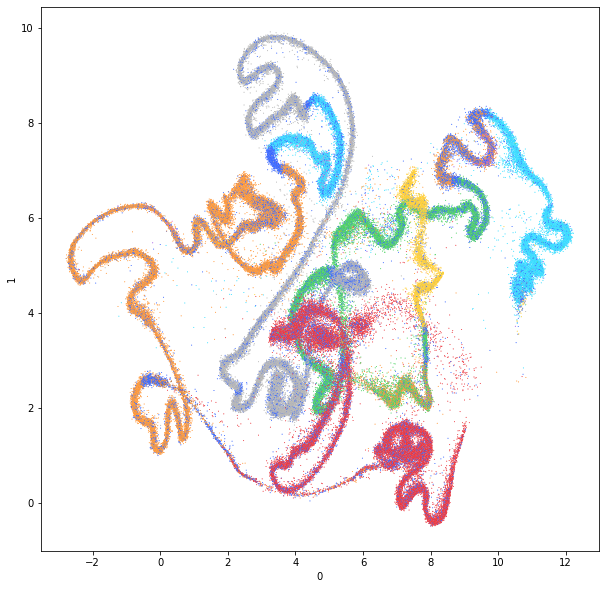

In [9]:
reduced['label'] = labels['# label']
two_plot(reduced)

In [15]:
cols = [c.lower() for c in primary.columns]

of_interest = [
    'plxnd1', 'gfra2', 'tcrb', 'dkk3',
    'nectin-3', 'chn2', 'ptn', 'cav1', 'gpr88', 'gm897'
]

of_interest = ['id2', 'sox5', 'tbr1', 'sox2', 'dcx', 'fezf2', 'plxnd1', 'gfra2', 'gad1'] #no tcrb gene

In [16]:
len(of_interest)

9

In [17]:
n = len(of_interest)
fig, axes = plt.subplots(2, 5, sharex=True, sharey=True, figsize=(15, 15))
for i, ax in enumerate(axes.flatten()):
    try:
        vals = pd.read_csv('../data/processed/primary.csv', usecols=[of_interest[i].upper()])
        reduced['vals'] = vals
        sns.scatterplot(
            ax=ax,
            x='0',
            y='1',
            data=reduced,
            hue='vals',
            legend=None,
            s=1,
        )
    except Exception as e:
        print(e)
    
    ax.set_title(of_interest[i])

Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.
Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.
Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.
list index out of range


IndexError: list index out of range

Error in callback <function flush_figures at 0x7f87ea498af0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
fig.savefig('gene_expressions.png')

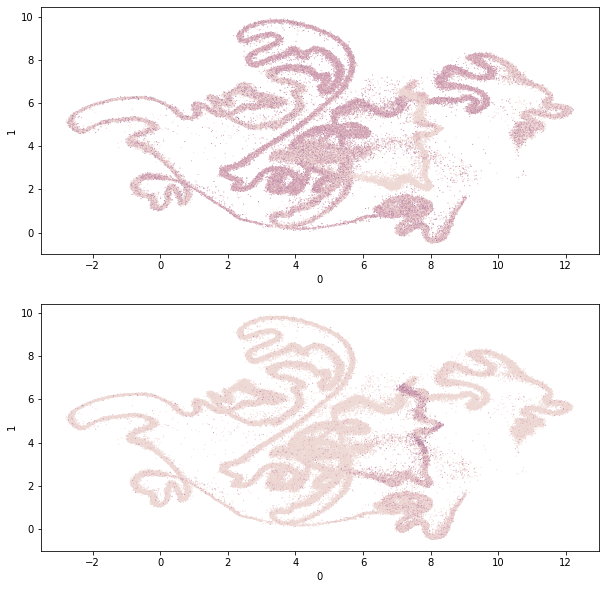

In [61]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(10, 10))
rows = range(0, 10000)

vals = pd.read_csv('../data/processed/primary.csv', usecols=['DCX'])
reduced['vals'] = vals

sns.scatterplot(
    ax=ax,
    x='0',
    y='1',
    data=reduced,
    hue='vals',
    legend=None,
    s=1,
)

vals = pd.read_csv('../data/processed/primary.csv', usecols=['SOX2'])
reduced['vals'] = vals

sns.scatterplot(
    ax=ax2,
    x='0',
    y='1',
    data=reduced,
    hue='vals',
    legend=None,
    s=1,
)

plt.show()

/var/folders/pd/jsjcl0fn7w57s5mfr34b20pm0000gn/T/ipykernel_49307/408335454.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


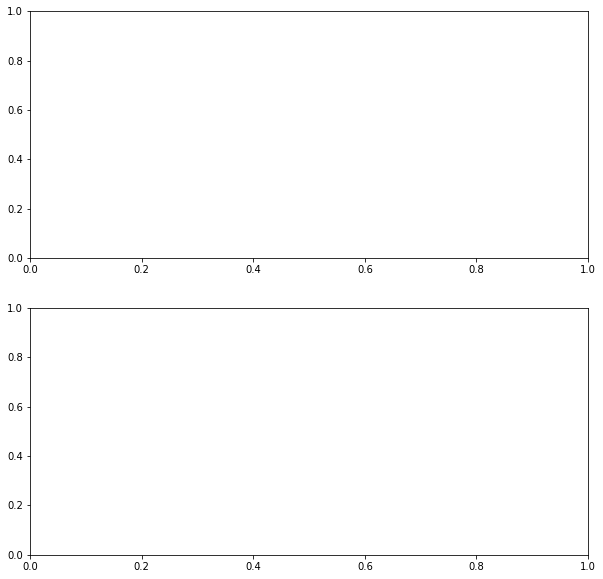